**Importing important libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Iris.csv') #read csv

In [3]:
df.head() #checking first 5 row

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
df.dtypes #checking the dtypes of the columns

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df['Species_coding'] = df['Species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[1,2,3]) 
#making a new column of species coding

In [7]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_coding
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1


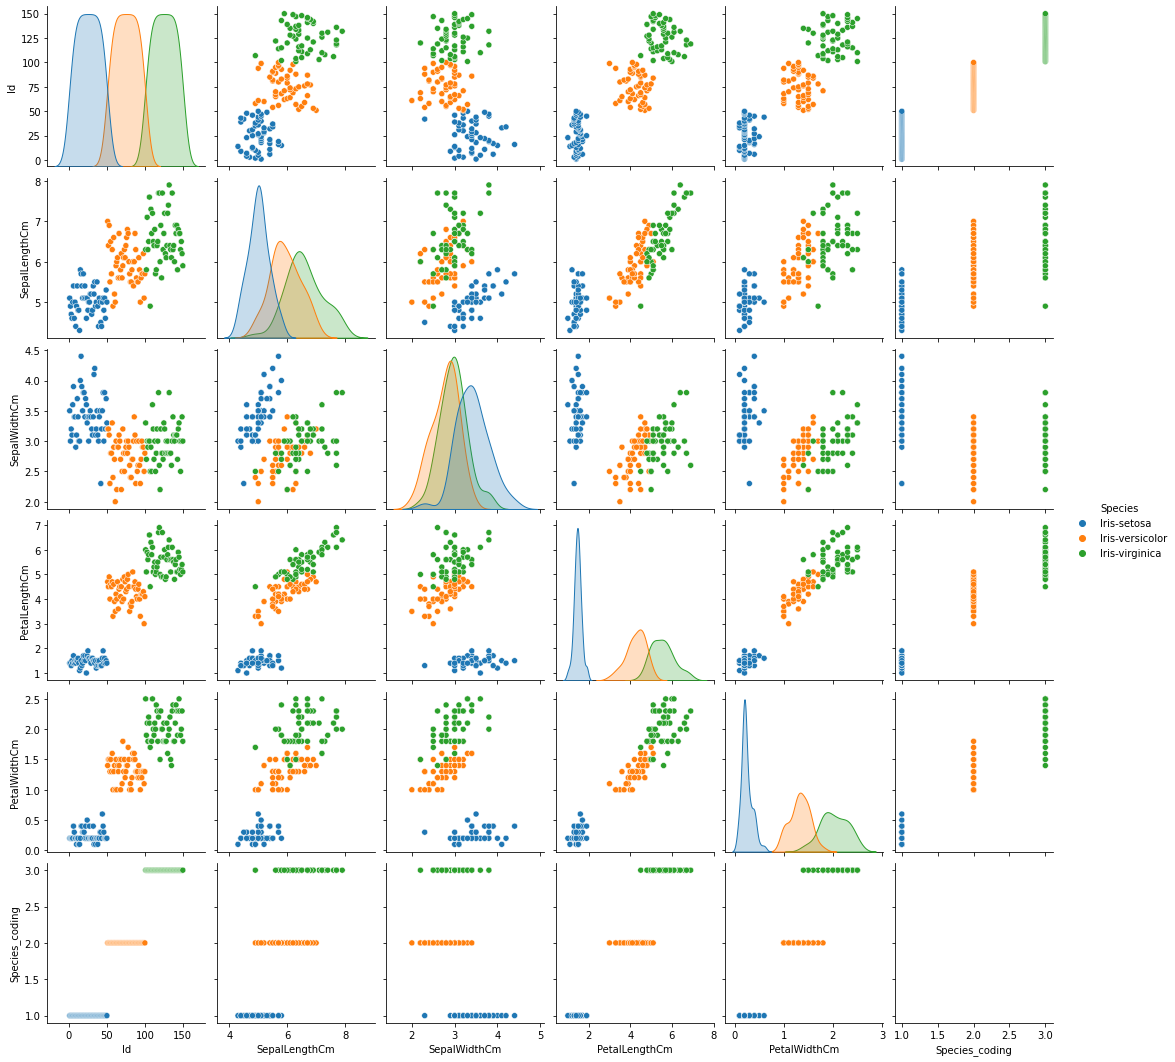

In [8]:
sns.pairplot(df , hue='Species')

In [9]:
df.drop('Id',axis=1,inplace=True) #dropping id column bcz its not needed

In [10]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_coding
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1


In [11]:
X = df.drop(['Species',	'Species_coding'],axis=1)
y = df['Species_coding'] 
#selecting my X and y

In [12]:
X.shape

(150, 4)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15) 
#spiliting X and y into X_train , y_train , X_test , y_test

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [16]:
error_rate = [] #create a empty list
for i in range(1,31):
  model = KNeighborsClassifier(n_neighbors=i)
  cross_val = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=5)
  error_rate.append(1-cross_val.mean())



Text(0.5, 1.0, 'Selecting the best K value')

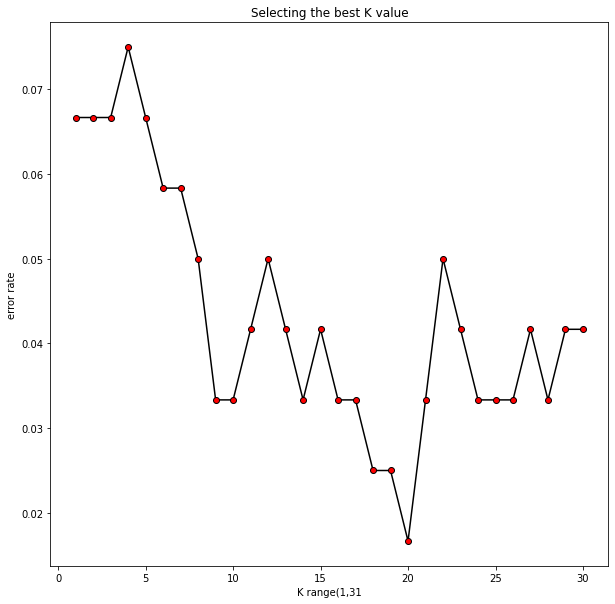

In [17]:
plt.figure(figsize=(10,10))
plt.plot(range(1,31),error_rate,color='Black',marker='o', markerfacecolor='red')
plt.xlabel('K range(1,31)')
plt.ylabel('error rate')
plt.title('Selecting the best K value')

#####according to the graph the best k value is 20

In [18]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [19]:
y_pred = model.predict(X_test)

In [20]:
model.score(X_train,y_train) #accuracy on tarin data

0.975

In [21]:
model.score(X_test,y_test) #accuracy on test data

1.0

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

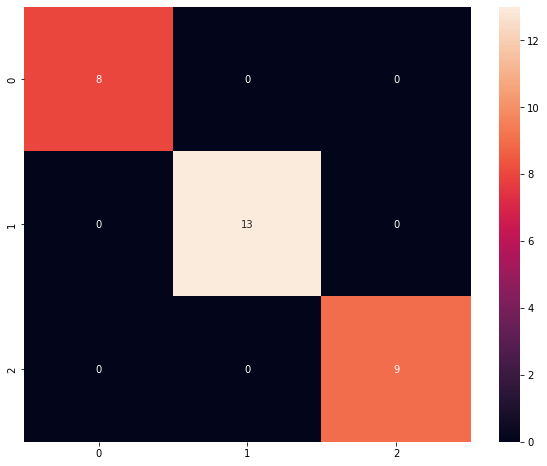

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
##predicting 
m1 = model.predict([[8.2,4.4,6.5,0.2]])
if m1==1:
  print('its Iris-setosa')
elif m1 == 2:
  print('its Iris-versicolor')
else:
  print('its Iris-virginica')

its Iris-virginica
